In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# for the addional queries
%matplotlib inline
from matplotlib import style
style.use('bmh')
import matplotlib.pyplot as plt
# Adding a Trendline and Equation for addional query's graphs
import seaborn as sns
from scipy import stats

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Getting header names, tobs means temperatures in degrees F
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e87f52ecd0>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1}

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# printed out the date to verify accuracy of the list
june_date_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
#print(june_date_temp)
last_element = june_date_temp[-1]
print(last_element)

('2017-06-30', 75.0)


In [5]:
#  3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
last_temp = june_temp[0]
print(last_temp)


(78.0,)


In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
#june_temp_df = pd.DataFrame(june_temp)
#print(june_temp_df)
june_temp_df = pd.DataFrame(june_temp, columns=['June Temps'])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_date_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
#print(dec_date_temp)
first_date_temp = dec_date_temp[0]
print(first_date_temp)

('2010-12-01', 76.0)


In [21]:
# 7. Convert the December temperatures to a list.
dec_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).\
    order_by(Measurement.date).all()
            
#print(dec_temp)
first_dec_temp = dec_temp[0]
print(first_dec_temp)

(76.0,)


In [22]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp, columns=['December Temps'])
print(dec_temp_df)

      December Temps
0               76.0
1               73.0
2               73.0
3               72.0
4               78.0
...              ...
1512            66.0
1513            71.0
1514            72.0
1515            67.0
1516            65.0

[1517 rows x 1 columns]


In [23]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [16]:
# Additional Querries (1)

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

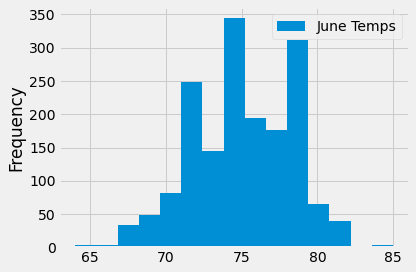

In [25]:
#Histogram of June Temperature results

june_temp_df.plot.hist(bins=15)
plt.tight_layout()

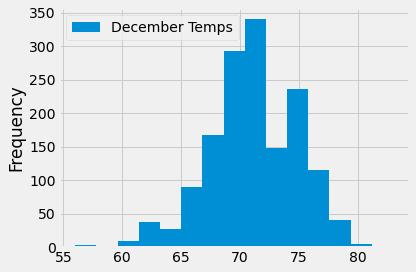

In [26]:
# Additional Querries (2)
#Histogram of December Temperature results

dec_temp_df.plot.hist(bins=15)
plt.tight_layout()

<AxesSubplot:ylabel='Frequency'>

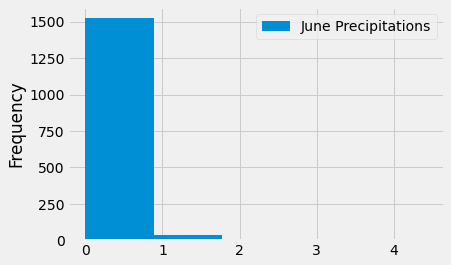

In [27]:
# June Precipitations
results = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).\
                  order_by(Measurement.date).all()
june_prcp = list(results)
june_prcp_df = pd.DataFrame(june_prcp, columns=['June Precipitations'])
june_prcp_df.plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

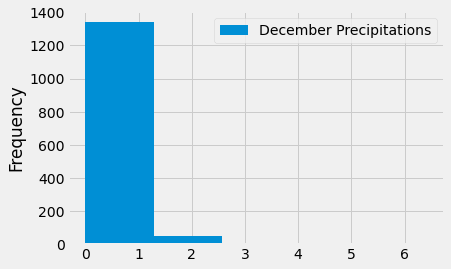

In [28]:
# December Precipitations
results = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).\
                  order_by(Measurement.date).all()
december_prcp = list(results)
december_prcp_df = pd.DataFrame(december_prcp, columns=['December Precipitations'])
december_prcp_df.plot.hist(bins=5)